In [161]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

# Traffice 2020

In [36]:
t_folder = '../data/traffic/'
t_files = glob(t_folder + '*.csv')

In [42]:
trf = pd.read_csv(t_files[0])
trf = trf.iloc[:,1:]
trf.columns = ['date', 'max', 'mean']
 # extract months and date 
trf['month'] = trf['date'].str.extract('(\D+)').iloc[:,0]
trf['day'] = trf['date'].str.extract('(\d+)').iloc[:,0]
month_list = s.unique().tolist()

,date,max,mean
0,1มกราคม,3.7,2.1
1,2มกราคม,5.5,2.7


In [60]:
month_dict = {}
for i, m in enumerate(month_list):
    i += 1
    if len(str(i))==1:
        month_dict[m] = '-0'+str(i)
    else:
        month_dict[m] = str(i)
        
print(month_dict)

{'มกราคม': '-01', 'กุมภาพันธ์': '-02', 'มีนาคม': '-03', 'เมษายน': '-04', 'พฤษภาคม': '-05', 'มิถุนายน': '-06', 'กรกฎาคม': '-07', 'สิงหาคม': '-08'}


In [78]:
# change month to number 
trf['month'] = trf['month'].replace(month_dict)

# combine month, date into one strings
date_list = []
for i, row in trf.iterrows():
    if len(row['day']) == 1:
        day = '-0' + row['day']
    else:
        day = '-' + row['day']
    new_date = '2020'+row['month'] + day
    date_list.append(new_date)
    
trf['date'] = pd.to_datetime(date_list)
trf = trf[['date','max','mean']]

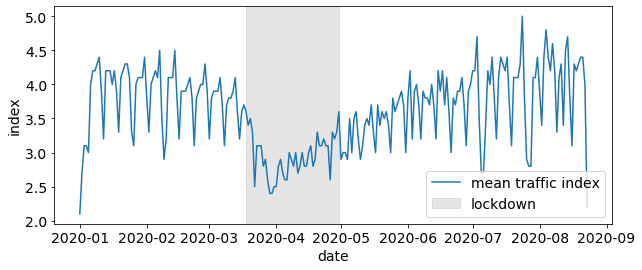

In [103]:
_, ax = plt.subplots(figsize=(10,4))
ax.plot(trf['date'], trf['mean'], label='mean traffic index')


#ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
ax.axvspan(datetime(2020, 3, 18), datetime(2020, 4, 30), color='gray', alpha=0.2, label='lockdown' )
ax.set_xlabel('date')
ax.set_ylabel('index')
ax.legend(loc='lower right')

# BKK Data 

In [110]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Bangkok')
dataset.build_all_data( build_fire=True, build_holiday = True)

save file ../data/bangkok/02t.csv
save file ../data/bangkok/03t.csv
save file ../data/bangkok/05t.csv
save file ../data/bangkok/11t.csv
save file ../data/bangkok/12t.csv
save file ../data/bangkok/50t.csv
save file ../data/bangkok/52t.csv
save file ../data/bangkok/53t.csv
save file ../data/bangkok/59t.csv
save file ../data/bangkok/61t.csv
Averaging data from 11 stations
Loading all hotspots data. This might take sometimes
before drop (3168630, 18)
after drop (3064842, 10)


In [112]:
# reinit the data and load saved process data 
dataset = Dataset('Bangkok')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

data no fire has shape (64438, 14)


Index(['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')


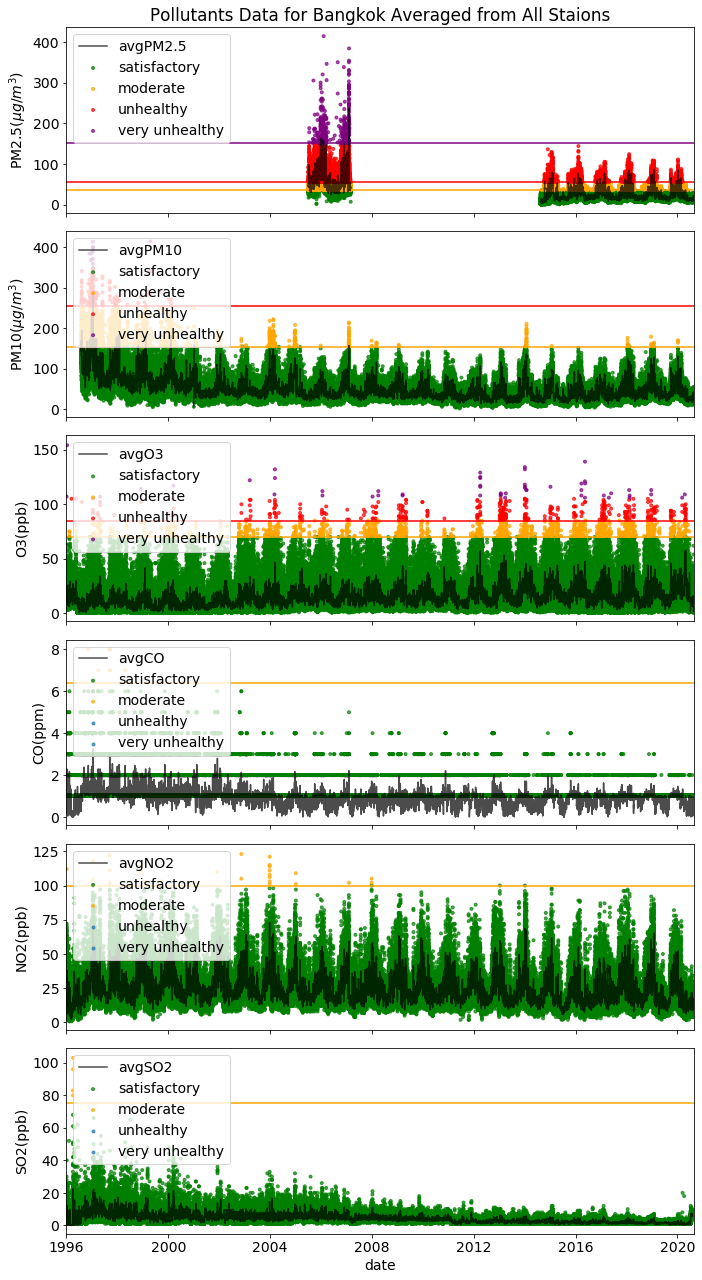

In [121]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)

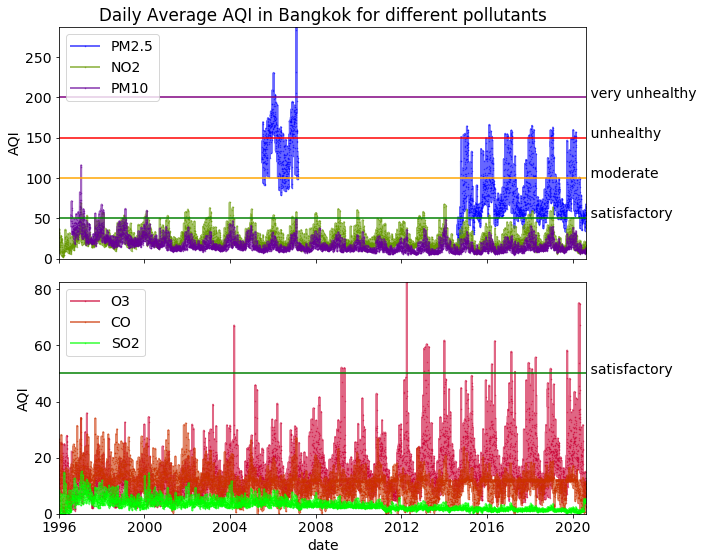

In [153]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

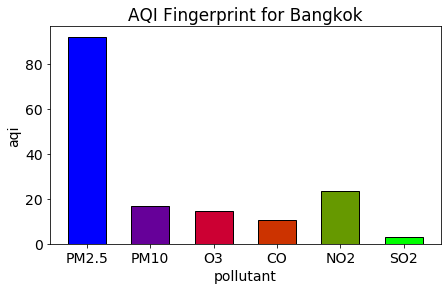

In [168]:
plot_chem_print(poll_to_aqi(dataset.poll_df.copy(), dataset.roll_dict).mean(axis=0), dataset.city_name, filename=dataset.report_folder + 'fingerprint.png')

In [ ]:
def plot_yearly_ln(dataset, poll_col=['PM2.5','PM10'], filename=None):
    """Obtain yearly trends of pollutions data, number of hotspots and temperatures to compare their trends. 
    
    Args:
        dataset: dataset object with all data 
        poll_col: pollution columns 
    
    """